<a href="https://colab.research.google.com/github/VPonomarev42/LearningRep/blob/miniproject_3/stats/stats_miniproject_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import iqr
%matplotlib inline

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

**Задания**
1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд.Найдите причину данной аномалии.

**Описание данных**
* **timestamp** – дата и время (точность до часа) 
**cnt** – количество аренд велосипедов за этот час
**t1** – температура, в С
**t2** – температура "ощущается как", в С 
**hum** – влажность (%)
**wind_speed** – скорость ветра, км/ч
**weather_code** – погодные условия
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
**isholiday** – является ли день праздником (1 – праздник, 0 – нет)
**isweekend** –  является ли день выходным (1 – выходной, 0 – нет)
**season** – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)




---

---





1. Загрузите [данные](https://stepik.org/media/attachments/lesson/384464/london.csv), проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.


In [21]:
sns.set(rc={'figure.figsize':(10,5)}, style='whitegrid')

In [9]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/384464/london.csv', parse_dates=[0])
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [11]:
data.shape

(17414, 10)

In [12]:
data.isna().value_counts()

timestamp  cnt    t1     t2     hum    wind_speed  weather_code  is_holiday  is_weekend  season
False      False  False  False  False  False       False         False       False       False     17414
dtype: int64

Пропусков в данных нет

Немного сэкономим памяти. Преобразуем столбцы 'weather_code', 'is_holiday', 'is_weekend', 'season' в тип UInt8.

In [19]:
data[['weather_code', 'is_holiday', 'is_weekend', 'season']] = data[['weather_code', 'is_holiday', 'is_weekend', 'season']].astype('uint8')

In [20]:
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             uint8
is_holiday               uint8
is_weekend               uint8
season                   uint8
dtype: object

2. Постройте график по числу поездок по дате и времени

In [33]:
count_by_date = data.groupby('timestamp').sum()[['cnt']].reset_index()
count_by_date.head()

,timestamp,cnt
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47


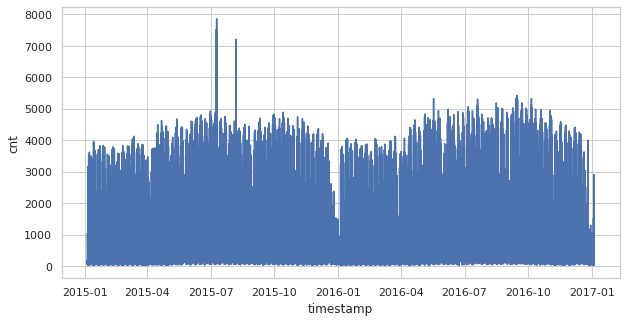

In [34]:
sns.lineplot(data=count_by_date, x='timestamp', y='cnt')

3.Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

Переформатировать входные данные можно следующим образом:
```
data.resample(rule='D').column_name.sum()
data.resample(rule='D').agg({'column_name':'sum'})
```



In [49]:
cnt_by_day = data.groupby('timestamp').sum()[['cnt']].resample(rule='D', kind='timestamp').cnt.sum()
cnt_by_day

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

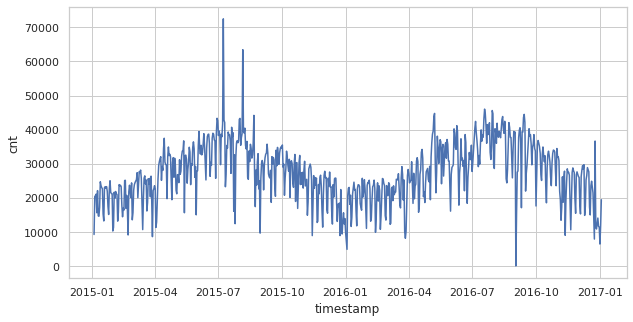

In [48]:
sns.lineplot(data=cnt_by_day.to_frame().reset_index(), x='timestamp', y='cnt')

4.Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [51]:
cnt_by_day_rolling_mean = cnt_by_day.rolling(3).mean()

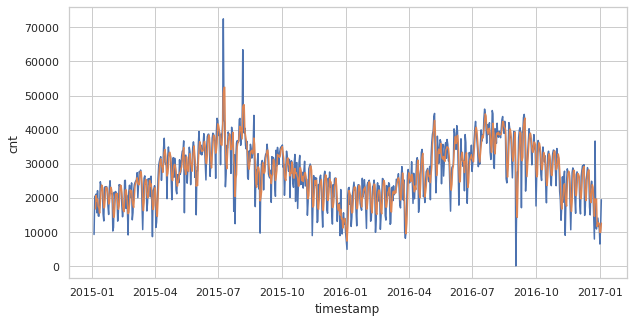

In [52]:
sns.lineplot(data=cnt_by_day.to_frame().reset_index(), x='timestamp', y='cnt')
sns.lineplot(data=cnt_by_day_rolling_mean.to_frame().reset_index(), x='timestamp', y='cnt')

График поездок по дням и сглаженный график поездки по дням с окном в 3 дня.

In [53]:
cnt_by_day_rolling_mean['2015-07-09']

50705.0

5.Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [55]:
diff_cnt = cnt_by_day - cnt_by_day_rolling_mean

In [60]:
np.round(np.std(diff_cnt), 2)

4558.59